In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath = 'Data/processed_data.csv'

In [3]:
data = pd.read_csv(filepath)
data

,Date,NaturalGas,CrudeOil,HeatingOil,Consumption,Production,UndergroundStorage
0,2001-01-01,7.4800,29.360001,0.84150,2676998,1753237,5609446.0
1,2001-02-01,5.5950,29.750000,0.77250,2309464,1582557,5240820.0
2,2001-03-01,5.2425,27.375000,0.72905,2246633,1766754,5041971.0
3,2001-04-01,5.1380,27.720000,0.75520,1807170,1703310,5252851.0
4,2001-05-01,4.2630,28.549999,0.77145,1522382,1763141,5749464.0
...,...,...,...,...,...,...,...
235,2020-08-01,2.3520,42.580002,1.24090,2401321,3011580,7911918.0
236,2020-09-01,2.3100,39.930000,1.11630,2171842,2917569,8228769.0
237,2020-10-01,2.8250,39.990000,1.15790,2320028,2991827,8321354.0
238,2020-11-01,2.8850,41.395000,1.24245,2434877,2984528,8325457.0


In [4]:
macro_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')
print(macro_data.shape)
macro_data.head()

(240, 6)


,NaturalGas,CrudeOil,HeatingOil,Consumption,Production,UndergroundStorage
Date,,,,,,
2001-01-01,7.4800,29.360001,0.84150,2676998,1753237,5609446.0
2001-02-01,5.5950,29.750000,0.77250,2309464,1582557,5240820.0
2001-03-01,5.2425,27.375000,0.72905,2246633,1766754,5041971.0
2001-04-01,5.1380,27.720000,0.75520,1807170,1703310,5252851.0
2001-05-01,4.2630,28.549999,0.77145,1522382,1763141,5749464.0


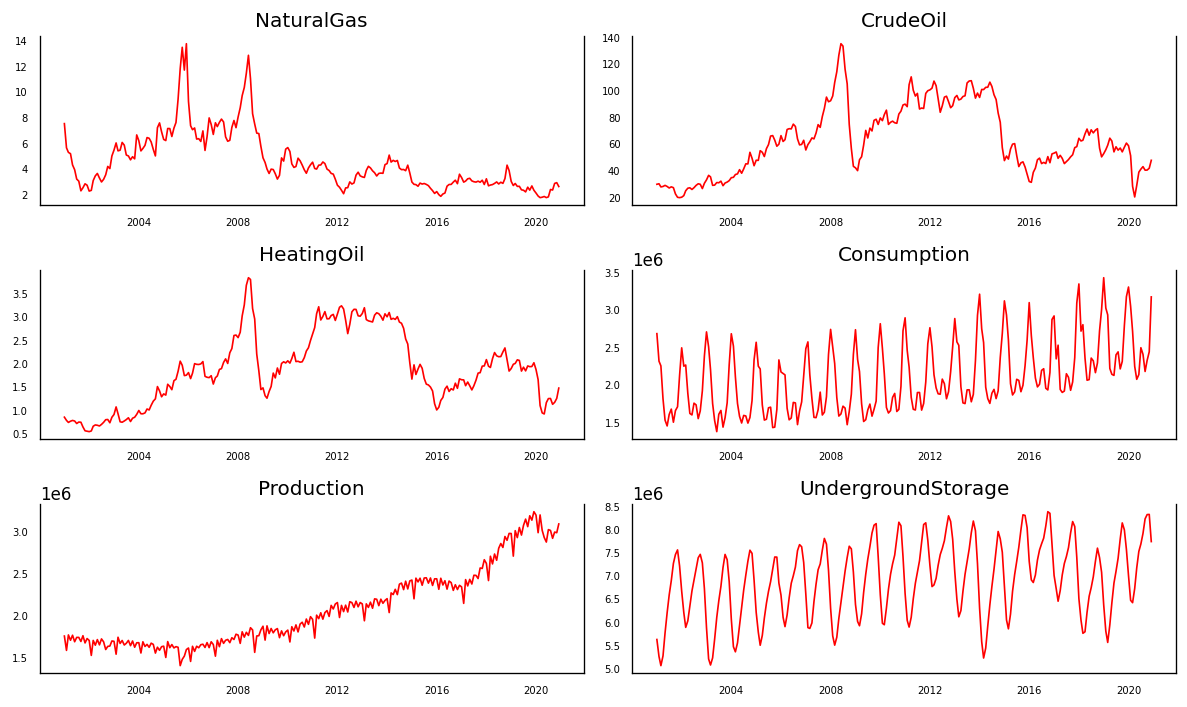

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [6]:
ad_fuller_result_1 = adfuller(macro_data['NaturalGas'])#.diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['CrudeOil'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -1.5436759161366382
p-value: 0.5118055891073908

---------------------

realcons
ADF Statistic: -10.740454388597588
p-value: 2.8269600128988323e-19


In [7]:
print('prod causes ng?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['NaturalGas', 'CrudeOil']], 4)

print('\ng causes prod?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['CrudeOil', 'NaturalGas']], 4)

prod causes ng?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0546  , p=0.8155  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=0.0553  , p=0.8141  , df=1
likelihood ratio test: chi2=0.0553  , p=0.8141  , df=1
parameter F test:         F=0.0546  , p=0.8155  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0741  , p=0.9286  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=0.1513  , p=0.9271  , df=2
likelihood ratio test: chi2=0.1512  , p=0.9272  , df=2
parameter F test:         F=0.0741  , p=0.9286  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3615  , p=0.0721  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=7.3002  , p=0.0629  , df=3
likelihood ratio test: chi2=7.1900  , p=0.0661  , df=3
parameter F test:         F=2.3615  , p=0.0721  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F 

In [8]:
macro_data = macro_data[['NaturalGas','CrudeOil']]
print(macro_data.shape)

(240, 2)


In [9]:
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [10]:
print(test_df.shape)

(12, 2)


In [11]:
model = VAR(train_df.diff()[1:])

In [12]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        2.856       2.888       17.39       2.869
1       2.774*      2.871*      16.02*      2.813*
2        2.783       2.944       16.17       2.848
3        2.796       3.021       16.38       2.887
4        2.810       3.100       16.62       2.927
5        2.826       3.180       16.88       2.969
6        2.824       3.243       16.86       2.994
7        2.818       3.301       16.75       3.013
8        2.854       3.401       17.37       3.075
9        2.812       3.424       16.66       3.059
10       2.841       3.517       17.16       3.114
11       2.864       3.605       17.56       3.164
12       2.893       3.698       18.10       3.219
13       2.917       3.787       18.54       3.269
14       2.949       3.882       19.15       3.326
15       2.953       3.951       19.25       3.357
16       2.990       4.052     

In [13]:
var_model = VARMAX(train_df, order=(1,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                               Statespace Model Results                               
Dep. Variable:     ['NaturalGas', 'CrudeOil']   No. Observations:                  228
Model:                                 VAR(1)   Log Likelihood                -956.749
                                  + intercept   AIC                           1931.497
Date:                        Tue, 29 Mar 2022   BIC                           1962.361
Time:                                00:14:43   HQIC                          1943.950
Sample:                            01-01-2001                                         
                                 - 12-01-2019                                         
Covariance Type:                          opg                                         
Ljung-Box (L1) (Q):            3.22, 21.88   Jarque-Bera (JB):       388.19, 149.26
Prob(Q):                        0.07, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.11, 1.96   Skew

In [14]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [15]:
predictions.columns=['ng_predicted','co_predicted']
predictions

,ng_predicted,co_predicted
2020-01-01,2.407113,60.200149
2020-02-01,2.514726,60.188030
2020-03-01,2.617109,60.173815
2020-04-01,2.714516,60.157670
2020-05-01,2.807191,60.139748
2020-06-01,2.895366,60.120195
2020-07-01,2.979260,60.099148
2020-08-01,3.059082,60.076737
2020-09-01,3.135031,60.053083
2020-10-01,3.207297,60.028300


In [16]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

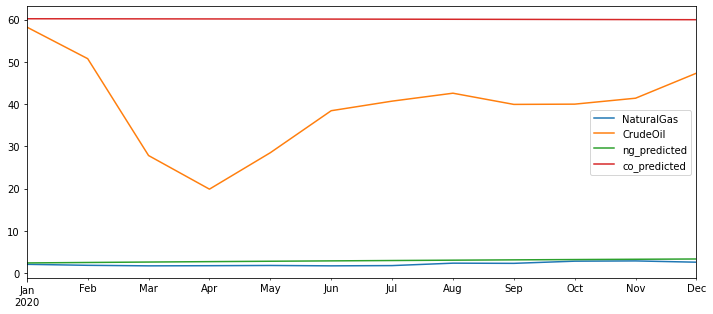

In [17]:
test_vs_pred.plot(figsize=(12,5))

In [18]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['ng_predicted'],test_df['NaturalGas']))
print('Mean value of NG is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['NaturalGas']),rmse_ulc))

rmse_rgnp=math.sqrt(mean_squared_error(predictions['co_predicted'],test_df['CrudeOil']))
print('Mean value of CO is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['CrudeOil']),rmse_rgnp))

Mean value of NG is : 2.137833322087924. Root Mean Squared Error is :0.8250040346792625
Mean value of CO is : 39.62666710217794. Root Mean Squared Error is :22.784277710963828


In [19]:
nggas = pd.concat([test_vs_pred["NaturalGas"],test_vs_pred["ng_predicted"]],axis=1)

<AxesSubplot:>

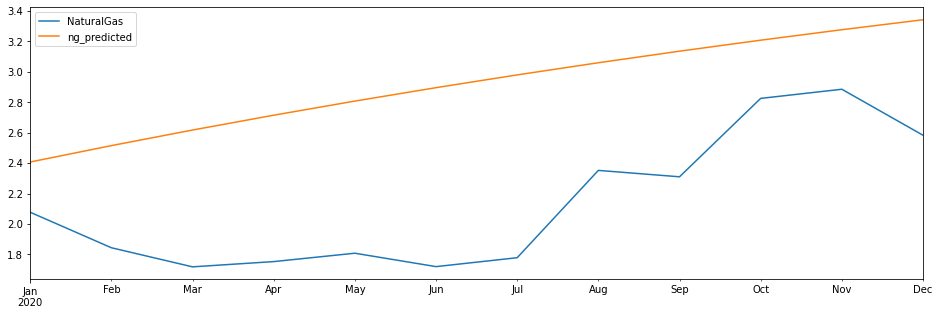

In [21]:
nggas.plot(figsize=(16,5))